In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#lets read the data
df = pd.read_csv('/content/drive/MyDrive/datascience_file/Churn_Modelling.csv')

In [ ]:
#check first 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#check for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#check for number of unique values for each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#drop unnecassary columns
df.drop(['Surname', 'RowNumber','CustomerId'], axis = 1,inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

  **EDA**

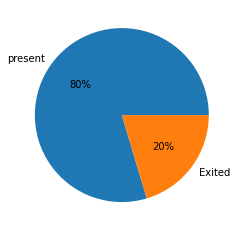

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
label = ['present','Exited']
plt.pie(x=df['Exited'].value_counts(),labels=label,autopct="%.0f%%")
plt.show()


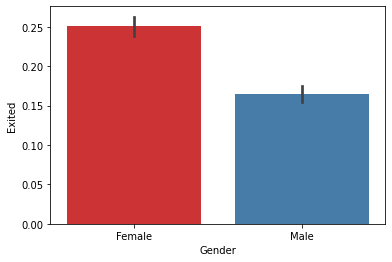

In [ ]:
sns.barplot(x=df.Gender,y=df.Exited,data=df,palette="Set1")
plt.show()

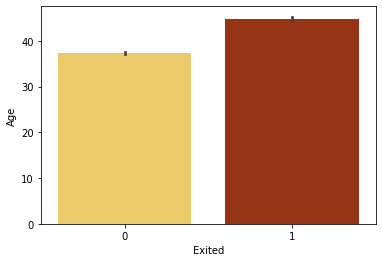

In [ ]:
sns.barplot(x=df['Exited'],y=df['Age'],palette="afmhot_r")
plt.show()

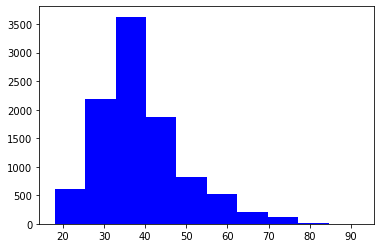

In [ ]:
plt.hist(df.Age,color='blue')
plt.show()

Categorical Encoding

In [ ]:
df = pd.get_dummies(df,drop_first=True)

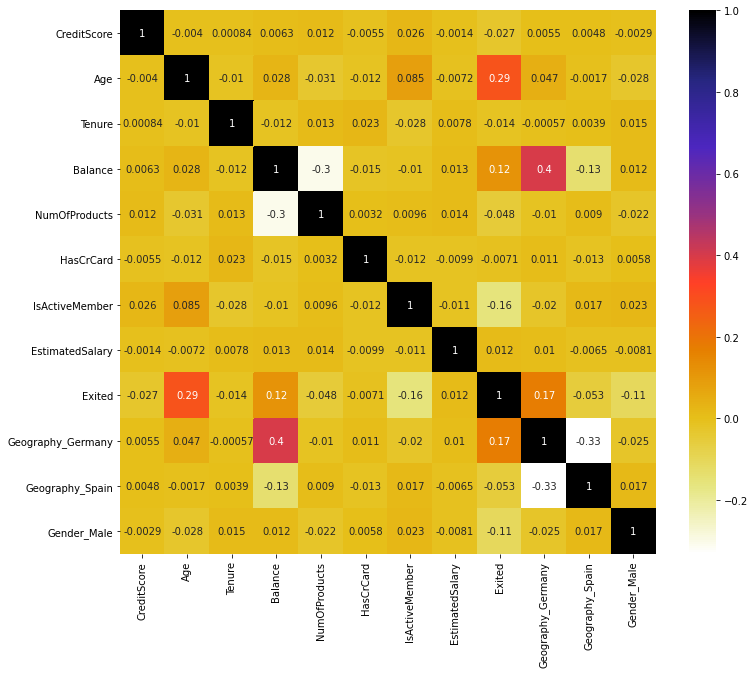

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#lets divide the data into x and y
y = df.Exited
x = df.drop('Exited',axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
#features scaling
stc = StandardScaler()
x_train = stc.fit_transform(x_train)
x_test = stc.transform(x_test)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
#initialize the classifier
model = Sequential()
model.add(Dense(units=347,kernel_initializer='he_uniform', input_dim=11, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=132,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=132,kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=242,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=482,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=242,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=412,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=332,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train, epochs=20, batch_size=1000)

Epoch 1/20
8/8 [==============================] - 1s 14ms/step - loss: 1.7588 - accuracy: 0.4481
Epoch 2/20
8/8 [==============================] - 0s 14ms/step - loss: 0.6305 - accuracy: 0.7065
Epoch 3/20
8/8 [==============================] - 0s 14ms/step - loss: 0.5955 - accuracy: 0.7726
Epoch 4/20
8/8 [==============================] - 0s 13ms/step - loss: 0.5737 - accuracy: 0.7819
Epoch 5/20
8/8 [==============================] - 0s 12ms/step - loss: 0.5693 - accuracy: 0.7828
Epoch 6/20
8/8 [==============================] - 0s 12ms/step - loss: 0.5348 - accuracy: 0.7967
Epoch 7/20
8/8 [==============================] - 0s 11ms/step - loss: 0.5359 - accuracy: 0.7896
Epoch 8/20
8/8 [==============================] - 0s 11ms/step - loss: 0.5191 - accuracy: 0.7920
Epoch 9/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4985 - accuracy: 0.7987
Epoch 10/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4977 - accuracy: 0.7926
Epoch 11/20
8/8 [============

In [ ]:
accuracy = model.evaluate(x_train, y_train)
print('Training Accuracy: %.0f' % (accuracy[-1]*100),'%')

250/250 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.7960
Training Accuracy: 80 %


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
print('Testing Accuracy:',round(score*100),'%')

Testing Accuracy: 80 %
